In [34]:
#import libs
import os, glob
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
import warnings
warnings.simplefilter("ignore")

In [4]:
DATA_PATH = '../data/processed/KPI_processed.parquet'

In [5]:
df = pd.read_parquet(DATA_PATH)
df.head(1)

,Time,eNodeB Name,Cell Name,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,EPM_ERAB_SR,EPM_DL_Traffic_GB,EPM_CSFB_Preparation_SR,EPM_CSFB_SR,...,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
0,2022-01-01,LSINS26110_Site_6110,LSINS26110-1,100.0,0.6307,0.0,99.947,0.9672,100.0,100.0,...,100.0,0,0,0,3600,0,1,1903,1888,1879


In [6]:
print("year of Dataset : {}".format(df['Time'].dt.year.unique()))

year of Dataset : [2022]


In [7]:
print("month of Dataset : {}".format(df['Time'].dt.month.unique()))

month of Dataset : [1]


In [8]:
print("Days of Dataset : {}".format(df['Time'].dt.day.unique()))

Days of Dataset : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [9]:
print("Hours of Dataset : {}".format(df['Time'].dt.hour.unique()))

Hours of Dataset : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [10]:
print("Number of Sites : {}".format(len(df['eNodeB Name'].unique())))

Number of Sites : 1424


In [11]:
print("Number of Cells : {}".format(len(df['Cell Name'].unique())))

Number of Cells : 9673


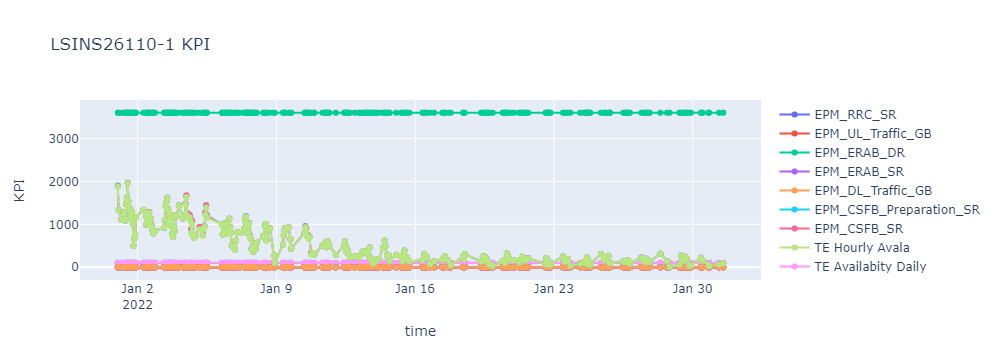

In [39]:
# Cell KPI
snap = df[(df['eNodeB Name']=='LSINS26110_Site_6110') & (df['Cell Name']=='LSINS26110-1')]
data = []
for i in snap.columns[3:]:
    trace = go.Scatter(x=snap['Time'],y=snap[i],name=i,mode='markers+lines')
    data.append(trace)
layout = go.Layout(title='{} KPI'.format(df['Cell Name'].iloc[0]), xaxis ={'title':'time'},yaxis={'title':'KPI'},hovermode='x unified')
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(categoryorder='category ascending')
fig.show()